Matrix([
[cos(theta), 0, -sin(theta), ^{a}q_x],
[         0, 1,           0,       0],
[sin(theta), 0,  cos(theta), ^{a}q_z],
[         0, 0,           0,       1]])

Matrix([
[^{a}q_x + ^{b}x*cos(theta) - ^{b}z*sin(theta)],
[                                        ^{b}y],
[^{a}q_z + ^{b}x*sin(theta) + ^{b}z*cos(theta)],
[                                            1]])

(2*^{a}q_x*a*sin(theta) + ^{b}x*a*sin(2*theta) - sqrt(2*^{a}q_x*a*sin(2*theta) - 2*^{a}q_z*a*cos(2*theta) + 2*^{a}q_z*a + 4*^{b}x*a*sin(theta) + 2*^{b}y**2*a**2*cos(2*theta) - 2*^{b}y**2*a**2 + cos(2*theta)/2 + 1/2) + cos(theta))/(2*a*sin(theta)**2)

(2*^{a}q_x*a*sin(theta) + ^{b}x*a*sin(2*theta) - sqrt(2*^{a}q_x*a*sin(2*theta) - 2*^{a}q_z*a*cos(2*theta) + 2*^{a}q_z*a + 4*^{b}x*a*sin(theta) + 2*^{b}y**2*a**2*cos(2*theta) - 2*^{b}y**2*a**2 + cos(2*theta)/2 + 1/2) + cos(theta))/(2*a*sin(theta)**2)


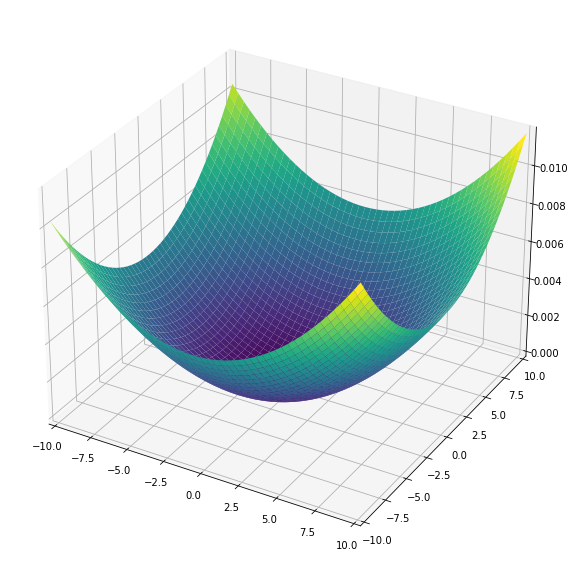

-2.82842712474619 + 3.0*sqrt(2)

1.4142135623730945

In [11]:
"baの変換のみでplot"
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

a, t, aqx, aqz = symbols("a, theta, ^{a}q_x, ^{a}q_z")
bx, by, bz = symbols("^{b}x, ^{b}y, ^{b}z")

T = Matrix([[cos(-t), 0, sin(-t), aqx], 
            [0, 1, 0, 0],
            [-sin(-t), 0, cos(-t), aqz],
            [0, 0, 0, 1]])
display(T)

bp= Matrix([bx, by, bz, 1])

ap = T*bp
display(ap)

f = a*(ap[0]**2 + ap[1]**2) - ap[2]

bz1, bz2 = solve(f, bz)
const = [(a, a), (t, t), (bx, bx), (by, by), (aqx, aqx), (aqz, aqz)] #テンプレート
const_plt = [(a, 1/(2*8666)), (t, np.deg2rad(11.73)), (bx, bx), (by, by), (aqx, 1800), (aqz, 1800**2/(2*8666)) ]# for plot

const1 = [(a, a), (t, t), (bx, qx), (by, 0), (aqx, aqx), (aqz, aqz)] 
const2 = [(a, 1/4), (t, pi*1/4), (bx, 0), (by, 0), (aqx, 2), (aqz, 1)] # 放物面はB系原点を通る -> z=0になるはず -> ok
const3 = [(a, 1/4), (t, pi*1/4), (bx, -2*sqrt(2)), (by, 0), (aqx, 2), (aqz, 1)] # noteで試した p2 -> ok
const4 = [(a, 1/4), (t, pi*1/4), (bx, -sqrt(2)), (by, 2), (aqx, 2), (aqz, 1)] # noteで試した p3 -> ok


display(bz1.subs(const))
#display(bz2.subs(const))
print(bz1.subs(const))

plt.rcParams["figure.figsize"] = (8,8)
#plotting.plot3d(bz1.subs(const_plt),bz2.subs(const_plt), (bx, -10, 10), (by, -10, 10))
plotting.plot3d(bz1.subs(const_plt), (bx, -10, 10), (by, -10, 10))

bz_const = bz1.subs(const4)
display(bz_const)
display(float(bz_const))

In [3]:
"cbの変換とbaの変換"
from sympy import *
import matplotlib.pyplot as plt

a, t, qx, qz, phi = symbols("a, theta, ^{a}q_x, ^{a}q_z, phi")
cx, cy, cz = symbols("^{c}x, ^{c}y, ^{c}z")


Tcb = Matrix([[cos(phi), -sin(phi), 0, 0],
              [sin(phi), cos(phi), 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

Tba = Matrix([[cos(-t), 0, sin(-t), qx], 
             [0, 1, 0, 0],
             [-sin(-t), 0, cos(-t), qz],
             [0, 0, 0, 1]])

cp = Matrix([cx, cy, cz, 1])

display(Tcb)
display(Tba)

ap = Tba*Tcb*cp  
f = a * (ap[0]**2 + ap[1]**2) - ap[2]
cz1, cz2 = solve(f, cz)
display(ap)
#display(cz1)
#display(cz2)

const = [(a, a), (t, t), (cx, cx), (cy, cy), (qx, qx), (qz, qz), (phi, phi)] #テンプレート
const1 = [(a, 1/4), (t, pi*1/4), (cx, cx), (cy, cy), (qx, 2), (qz, 1), (phi, pi*0)] # for plot
const2 = [(a, 1/4), (t, pi*1/4), (cx, 2*sqrt(2)), (cy, 0), (qx, 2), (qz, 1), (phi, pi*1)] # phi=180でnoteの p2 -> ok 2sqrt(2)
const3 = [(a, 1/4), (t, pi*1/4), (cx, 0), (cy, 2*sqrt(2)), (qx, 2), (qz, 1), (phi, pi*1/2)] # phi=90でnoteの p2 -> ok 2sqrt(2)
const4 = [(a, 1/4), (t, pi*1/4), (cx, -2), (cy, sqrt(2)), (qx, 2), (qz, 1), (phi, pi*1/2)] # phi=90でnoteの p3 -> ok sqrt(2)
const5 = [(a, 1/4), (t, pi*1/4), (cx, -2), (cy, 2), (qx, 2), (qz, 1), (phi, pi*1/4)] # phi=45でnoteの p2 -> ok 2sqrt(2)
const6 = [(a, 1/4), (t, pi*1/4), (cx, -1-sqrt(2)), (cy, 1-sqrt(2)), (qx, 2), (qz, 1), (phi, pi*1/4)] # phi=45でnoteの p3 -> ok sqrt(2)
const7 = [(a, 1/4), (t, pi*1/4), (cx, -1+sqrt(2)), (cy, -1-sqrt(2)), (qx, 2), (qz, 1), (phi, -pi*1/4)] # phi=-45でnoteの p3 -> ok sqrt(2)
const8 = [(a, 1/4), (t, pi*1/4), (cx, 0), (cy, 0), (qx, 2), (qz, 1), (phi, pi*0)] # phi=0 で原点co -> ok 0
const9 = [(a, 1/(4*4333)), (t, 0.204), (cx, cx), (cy, cy), (qx, 1800), (qz, 186), (phi, pi*0)] # 実際のparametarでplot

mask = 1*( cx**2+cy**2 <= (1850/2)**2)

plt.rcParams["figure.figsize"] = (8,8)
#plotting.plot3d(cz1.subs(const1),cz2.subs(const1), (cx, -1, 1), (cy, -1, 1))
#plotting.plot3d(cz1.subs(const9), (cx, -1000, 1000), (cy, -1000, 1000))

cz_const = cz1.subs(const)
display(cz_const)
#display(float(cz_const))

Matrix([
[cos(phi), -sin(phi), 0, 0],
[sin(phi),  cos(phi), 0, 0],
[       0,         0, 1, 0],
[       0,         0, 0, 1]])

Matrix([
[cos(theta), 0, -sin(theta), ^{a}q_x],
[         0, 1,           0,       0],
[sin(theta), 0,  cos(theta), ^{a}q_z],
[         0, 0,           0,       1]])

Matrix([
[^{a}q_x + ^{c}x*cos(phi)*cos(theta) - ^{c}y*sin(phi)*cos(theta) - ^{c}z*sin(theta)],
[                                                   ^{c}x*sin(phi) + ^{c}y*cos(phi)],
[^{a}q_z + ^{c}x*sin(theta)*cos(phi) - ^{c}y*sin(phi)*sin(theta) + ^{c}z*cos(theta)],
[                                                                                 1]])

TypeError: unsupported operand type(s) for *: 'int' and 'LessThan'

In [17]:
"python scriptに組み込める形式で表示"
from sympy import *

a, t, qx, qz, phi = symbols("a, theta, aqx, aqz, phi")
cx, cy, cz = symbols("cx, cy, cz")


Tcb = Matrix([[cos(phi), -sin(phi), 0, 0],
              [sin(phi), cos(phi), 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

Tba = Matrix([[cos(-t), 0, sin(-t), qx], 
             [0, 1, 0, 0],
             [-sin(-t), 0, cos(-t), qz],
             [0, 0, 0, 1]])

cp = Matrix([cx, cy, cz, 1])

#display(Tcb)
#display(Tba)

ap = Tba*Tcb*cp
f = a * (ap[0]**2 + ap[1]**2) - ap[2]
cz1, cz2 = solve(f, cz)
cz1, cz2 = simplify(cz1), simplify(cz2)
display(cz1)
print(cz1)

#花村さんに見せる用
x, y, qxx, qzz = symbols("x, y, q_x, q_y")
const = [(a, a), (t, t), (cx, x), (cy, y), (qx, qxx), (qz, qzz), (phi, 0)] #テンプレート
display(cz1.subs(const))
print(cz1.subs(const))

(4*a*aqx*sin(theta) - a*cx*(sin(phi - 2*theta) - sin(phi + 2*theta)) - a*cy*(cos(phi - 2*theta) - cos(phi + 2*theta)) - 2*sqrt(-4*a**2*cx**2*sin(phi)**2*sin(theta)**2 - 8*a**2*cx*cy*sin(phi)*sin(theta)**2*cos(phi) + 4*a**2*cy**2*sin(phi)**2*sin(theta)**2 - 4*a**2*cy**2*sin(theta)**2 + 2*a*aqx*sin(2*theta) + 4*a*aqz*sin(theta)**2 + 4*a*cx*sin(theta)*cos(phi) - 4*a*cy*sin(phi)*sin(theta) - sin(theta)**2 + 1) + 2*cos(theta))/(4*a*sin(theta)**2)

(4*a*aqx*sin(theta) - a*cx*(sin(phi - 2*theta) - sin(phi + 2*theta)) - a*cy*(cos(phi - 2*theta) - cos(phi + 2*theta)) - 2*sqrt(-4*a**2*cx**2*sin(phi)**2*sin(theta)**2 - 8*a**2*cx*cy*sin(phi)*sin(theta)**2*cos(phi) + 4*a**2*cy**2*sin(phi)**2*sin(theta)**2 - 4*a**2*cy**2*sin(theta)**2 + 2*a*aqx*sin(2*theta) + 4*a*aqz*sin(theta)**2 + 4*a*cx*sin(theta)*cos(phi) - 4*a*cy*sin(phi)*sin(theta) - sin(theta)**2 + 1) + 2*cos(theta))/(4*a*sin(theta)**2)


(4*a*q_x*sin(theta) + 2*a*x*sin(2*theta) - 2*sqrt(-4*a**2*y**2*sin(theta)**2 + 2*a*q_x*sin(2*theta) + 4*a*q_y*sin(theta)**2 + 4*a*x*sin(theta) - sin(theta)**2 + 1) + 2*cos(theta))/(4*a*sin(theta)**2)

(4*a*q_x*sin(theta) + 2*a*x*sin(2*theta) - 2*sqrt(-4*a**2*y**2*sin(theta)**2 + 2*a*q_x*sin(2*theta) + 4*a*q_y*sin(theta)**2 + 4*a*x*sin(theta) - sin(theta)**2 + 1) + 2*cos(theta))/(4*a*sin(theta)**2)


Matrix([
[ ^{b}x*cos(theta) + ^{b}y*sin(theta)],
[-^{b}x*sin(theta) + ^{b}y*cos(theta)]])

^{b}x*sin(theta) - ^{b}y*cos(theta) + (^{b}x*cos(theta) + ^{b}y*sin(theta))**2

(-^{b}x*sin(2*theta) - sqrt(-4*^{b}x*sin(theta) + cos(theta)**2) + cos(theta))/(2*sin(theta)**2)

(-^{b}x*sin(2*theta) + sqrt(-4*^{b}x*sin(theta) + cos(theta)**2) + cos(theta))/(2*sin(theta)**2)

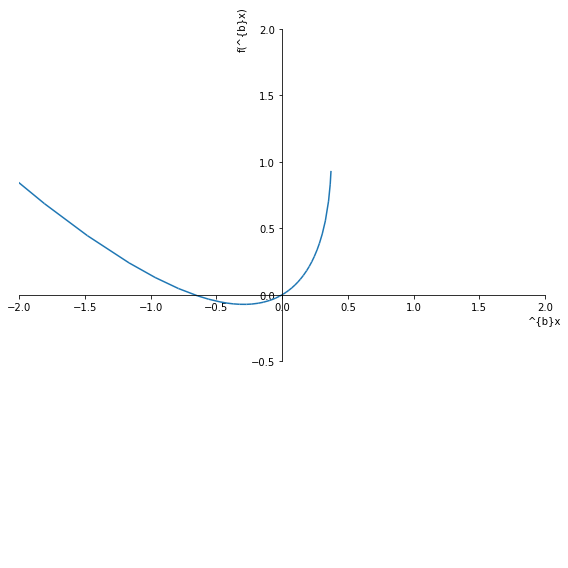

In [119]:
"（単純化して）平面上での回転、陽関数として表記してから図示"
bx, by, t = symbols("^{b}x,^{b}y, theta")

rba = Matrix([[cos(-t), -sin(-t)],
              [sin(-t), cos(-t)]])
bp = Matrix([bx, by])

ap = rba*bp
display(ap)

f = 1 *ap[0]**2 - ap[1]
display(f)

by1, by2 = solve(f, by)
const = [(t, pi*1/6)]
const1 = [(t, pi*1/6), (bx, 0)]

display(by1)
display(by2)

plt.rcParams["figure.figsize"] = (8,8)
#plot(by1.subs(const), by2.subs(const), (bx, -2, 2), (by, -2, 2))
plot(by1.subs(const), xlim=[-2,2], ylim=[-2,2])

Matrix([
[^{b}x*cos(theta) - ^{b}y*sin(theta)],
[^{b}x*sin(theta) + ^{b}y*cos(theta)]])

Eq(2*(^{b}x*cos(theta) - ^{b}y*sin(theta))**2, ^{b}x*sin(theta) + ^{b}y*cos(theta))

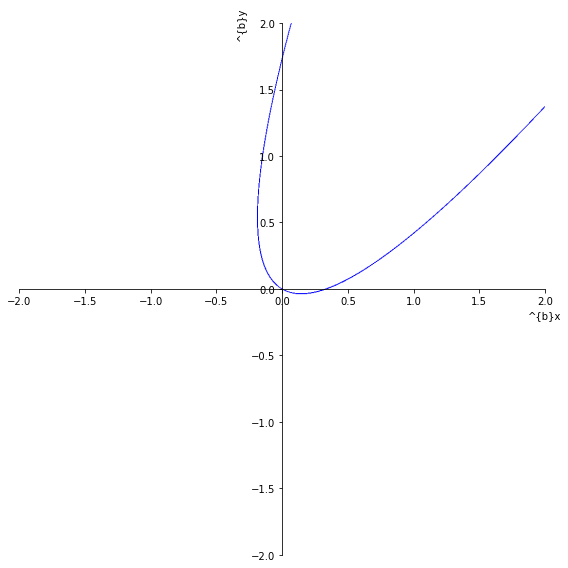

In [162]:
"平面上での回転、陰関数plot"
import matplotlib.pyplot as plt

bx, by, at = symbols("^{b}x,^{b}y, theta")

rba = Matrix([[cos(at), -sin(at)],
              [sin(at), cos(at)]])
bp = Matrix([bx, by])

ap = rba*bp
display(ap)
eq = Eq(2*ap[0]**2, ap[1])
display(eq)

plt.rcParams["figure.figsize"] = (8,8)
plot_implicit(eq.subs(at, pi*1/6), (bx, -2, 2), (by, -2, 2))

In [177]:
bx, by, bz = symbols("^{b}x, ^{b}y, ^{b}z")
Tcb = Matrix([[cos(phi), -sin(phi), 0, 0],
              [sin(phi), cos(phi), 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])
bp= Matrix([bx, by, bz, 1])
cp = Tcb*bp
cp.subs([(phi, pi/4), (bx, -sqrt(2)), (by, -2), (bz, sqrt(2))])

Matrix([
[-1 + sqrt(2)],
[-sqrt(2) - 1],
[     sqrt(2)],
[           1]])

In [194]:
sqrt(-2)

sqrt(2)*I

In [ ]:
a, b, c, d, e, y, d = symbols("a, b, c, d, e, y_{0}, d")
123*456